In [151]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px


In [149]:
# Writing data from excel sheet

df=pd.read_excel("financial_loan.xlsx")

In [152]:
df.sample(4)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
5046,994123,OH,INDIVIDUAL,< 1 year,"Pacer International, Inc.",E,MORTGAGE,2021-10-11,2021-05-16,2021-05-14,...,E2,36 months,Verified,85000.0,0.1313,880.11,0.1903,24000,24,30615
19384,430533,UT,INDIVIDUAL,< 1 year,State of Utah,C,MORTGAGE,2021-08-09,2021-05-16,2021-11-09,...,C5,36 months,Verified,70000.0,0.0799,204.46,0.1379,6000,15,6203
14065,771413,FL,INDIVIDUAL,2 years,jp morgan chase,D,MORTGAGE,2021-06-11,2021-01-16,2021-06-14,...,D2,36 months,Source Verified,24000.0,0.1225,175.77,0.1599,5000,26,6327
3291,493897,CA,INDIVIDUAL,10+ years,Toshiba American Medical Systems,C,RENT,2021-03-10,2021-05-16,2021-04-11,...,C4,36 months,Not Verified,49270.0,0.2319,596.82,0.1385,17500,32,19755


In [4]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [5]:
print(f"Number of rows {df.shape[0]} and columns {df.shape[1]}")

Number of rows 38576 and columns 24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [7]:
df.isna().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [8]:
df.describe(exclude=['datetime','object','category'])

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# Total Number of Loan Applications till date  
print(f" Total Loan Applicaitons till date {df.id.count()}")

 Total Loan Applicaitons till date 38576


 ***There are total more than 38 thousand loan applications had been approved at 2021***

In [153]:
# Total Number of Loan Applications received during specific period. specially Month-to-Date Loan Applications.

latest_month=df.issue_date.max().month
latest_year=df.issue_date.max().year

print(f" Total Number of application received on Month-to-date is {(df[(df.issue_date.dt.month==latest_month) & 
                                                                    (df.issue_date.dt.year==latest_year)]
                                                                    ['id'].count())}")

 Total Number of application received on Month-to-date is 4314


***Month-to-date generally refers to the total amount received/funded of the current month***

# ***Total Amount of Funds in Millions***

In [12]:
# Total Amount of Funds given away by bank 

total_amt = df.loan_amount.sum()

print(f" Total amount disbursed by bank $ {round((total_amt/1000000),2)} M ")

 Total amount disbursed by bank $ 435.76 M 


In [13]:
# Total Amount of funds had been disbursed as loans is crucial of Month-to-date. 

total_mtd_amt=df[(df.issue_date.dt.month==df.issue_date.max().month) & (df.issue_date.dt.year==df.issue_date.max().year)]['loan_amount'].sum()

print(f"Total Amount paid by Bank (MTD) $ {round((total_mtd_amt / 1000000),2)} M")

Total Amount paid by Bank (MTD) $ 53.98 M


In [14]:
# Total Amount received from customers 

print(f" Total Amount received $ {round((df.total_payment.sum()/1000000),2)} M")

 Total Amount received $ 473.07 M


In [15]:
# Totall Amount of funds received of Month-to-date 

total_rtd_amt=df[(df.issue_date.dt.month==df.issue_date.max().month) & (df.issue_date.dt.year==df.issue_date.max().year)]

print(f" Total Amount received in this month $ {round((total_rtd_amt.total_payment.sum()/1000000),2)} M")

 Total Amount received in this month $ 58.07 M


# ***Average Overall Rate of Interest and DTI***

In [16]:
# Overall Interest Rate across all loans which will provide insights into lending portolio's overall cost

print(f" Average overall Interest rate is {round((df.int_rate*100).mean(),2)} %")

 Average overall Interest rate is 12.05 %


In [17]:
# Average Debt-to-income Ratio of all customers 

print(f" Average DTI of customers are {round((df.dti*100).mean(),2)} %")

 Average DTI of customers are 13.33 %


In [19]:
df.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

# ***Good Loan V/S Bad Loan Metrics***

In [29]:
# finding the percentage of good loan and overall profit gain from it 

good_loan = df[df.loan_status.isin(['Fully Paid','Current'])]

print(f" Overall percentage of Good Loan are {round(((good_loan.id.size/df.id.size)*100),2)} % ")

total_spend=good_loan.loan_amount.sum()
total_received=good_loan.total_payment.sum()

print(f" Total Funded Amount {round((good_loan.loan_amount.sum()/1000000),2)} M")
print(f" Total Amount received {round((good_loan.total_payment.sum()/1000000),2)} M")
print(f" Overall profit generated is {round(((total_received-total_spend)/1000000),2)} M")
print(f" Profit Verdict in Percentage {(round((((total_received-total_spend)/1000000)/(total_spend/1000000)),4))*100} %")

 Overall percentage of Good Loan are 86.18 % 
 Total Funded Amount 370.22 M
 Total Amount received 435.79 M
 Overall profit generated is 65.56 M
 Profit Verdict in Percentage 17.71 %


In [34]:
# finding the percentage of bad loan and overall profit gain from it 

bad_loan = df[df.loan_status.isin(['Charged Off'])]

print(f" Overall percentage of Bad Loan are {round(((bad_loan.id.size/df.id.size)*100),2)} % ")

total_spend=bad_loan.loan_amount.sum()
total_received=bad_loan.total_payment.sum()

print(f" Total Funded Amount {round((bad_loan.loan_amount.sum()/1000000),2)} M")
print(f" Total Amount received {round((bad_loan.total_payment.sum()/1000000),2)} M")
print(f" Overall profit generated is {round(((total_received-total_spend)/1000000),2)} M")
print(f" Profit Verdict in Percentage {(round((((total_received-total_spend)/1000000)/(total_spend/1000000)),4))*100} %")

 Overall percentage of Bad Loan are 13.82 % 
 Total Funded Amount 65.53 M
 Total Amount received 37.28 M
 Overall profit generated is -28.25 M
 Profit Verdict in Percentage -43.1 %


# ***Monthly Trends of Total Amount Funded*** 

In [73]:
monthly_funded= (
    df.sort_values('issue_date').assign(month_name=lambda x : x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name',sort=False)['loan_amount'].sum()
    .div(1000000).round(2)
    .reset_index(name='loan_amt_millions'))


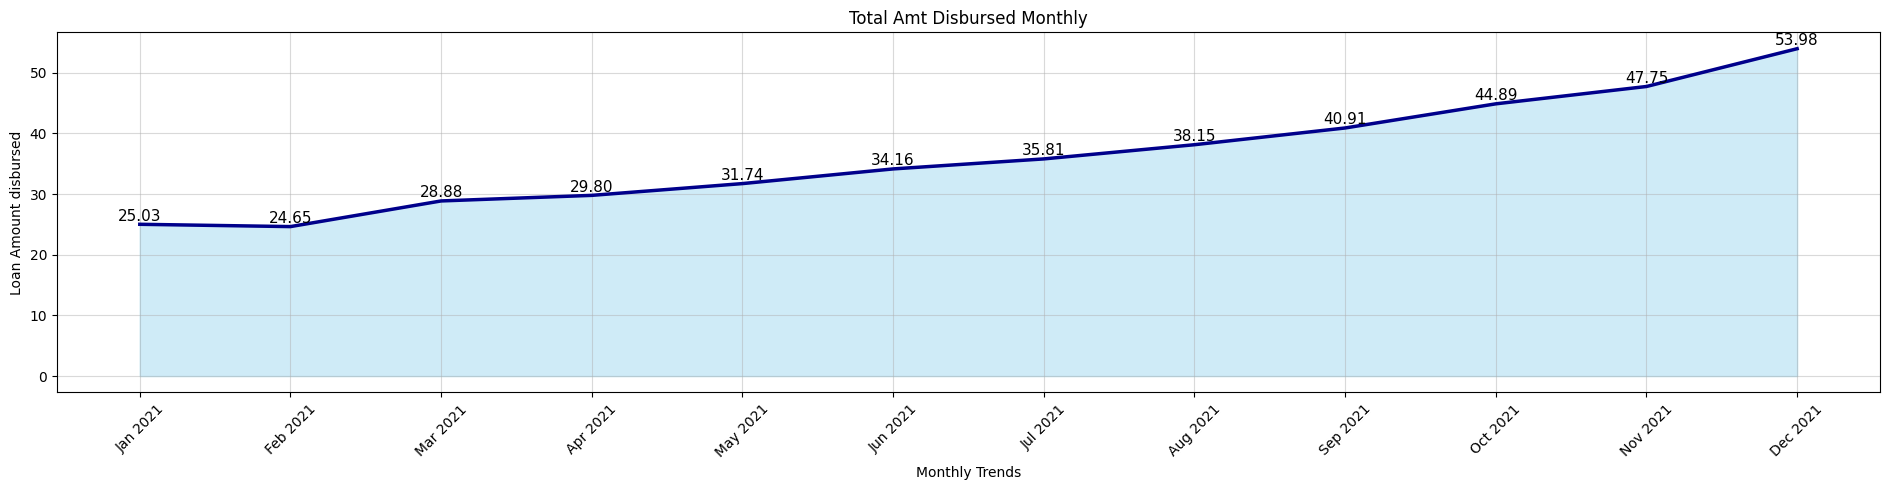

In [74]:
plt.figure(figsize=(19,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amt_millions'],color='skyblue',alpha=0.4)
plt.plot(monthly_funded.month_name,monthly_funded.loan_amt_millions,color='darkblue',linewidth=2.5)

for i,row in monthly_funded.iterrows():
    plt.text(i,row.loan_amt_millions+0.1,f"{row.loan_amt_millions:.2f}",
             ha='center',va='bottom',fontsize=11,rotation=0,color='black')
plt.grid(True,alpha=0.48)
plt.xlabel('Monthly Trends')
plt.ylabel('Loan Amount disbursed')
plt.title('Total Amt Disbursed Monthly')
plt.xticks(ticks=range(len(monthly_funded)),labels=monthly_funded['month_name'],rotation=45)
plt.tight_layout()
plt.show()

# ***Monthly Trends of Total Amount Received*** 

In [82]:
monthly_received = (
    df.sort_values(by='issue_date').assign(month_name=lambda x : df.issue_date.dt.strftime('%b %Y'))
    .groupby('month_name',sort=False).total_payment.sum().div(1000000)
    .reset_index(name='amt_in_millions')

    
)

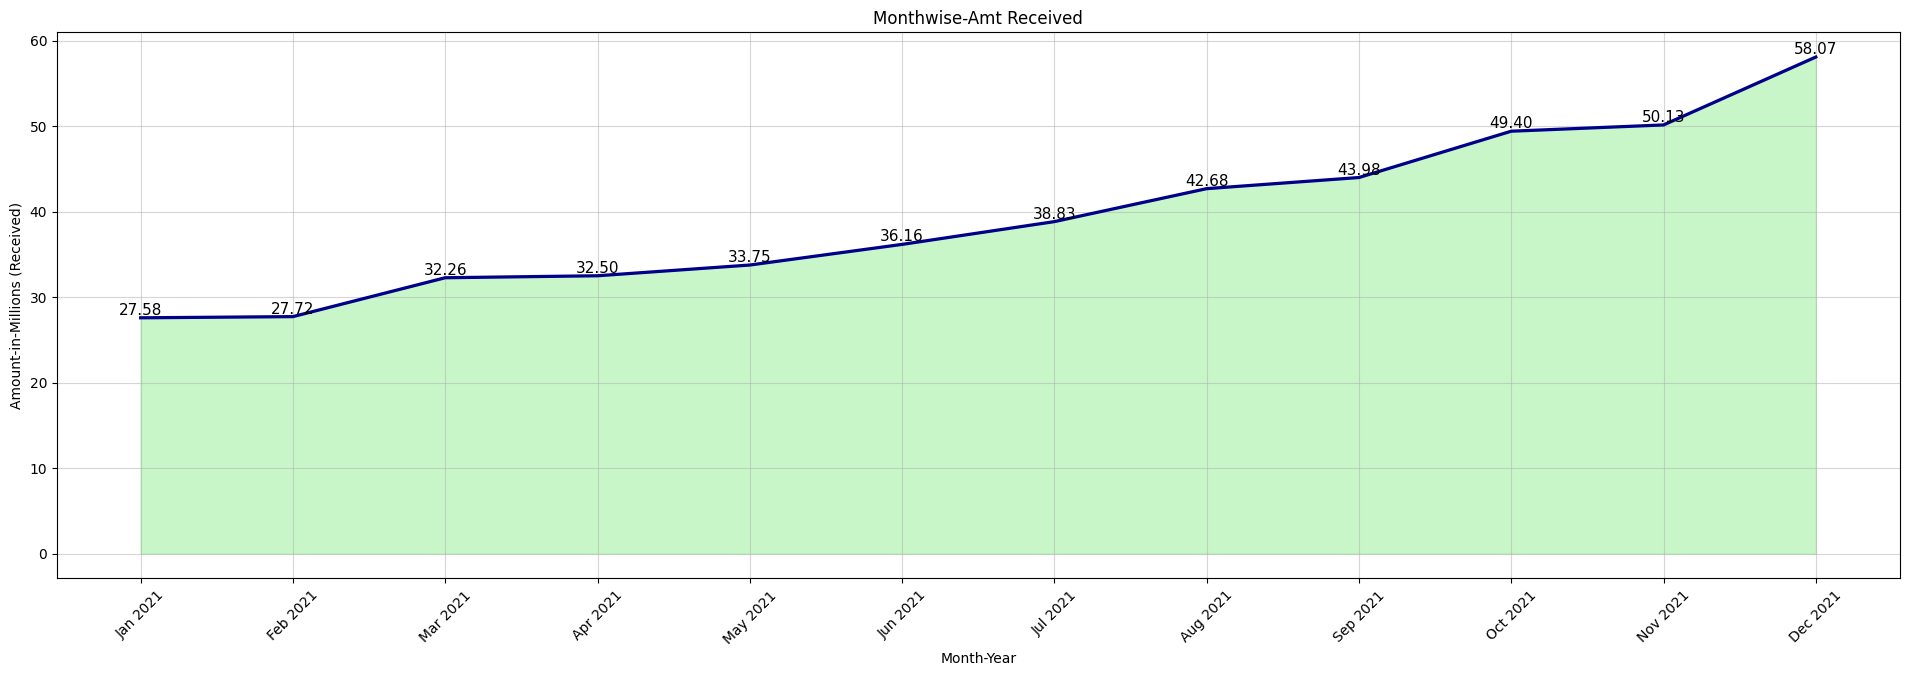

In [105]:
plt.figure(figsize=(19,6))
plt.fill_between(monthly_received['month_name'],monthly_received['amt_in_millions'],color='lightgreen',alpha=0.49)
plt.plot(monthly_received.month_name,monthly_received.amt_in_millions,color='darkblue',linewidth=2.32)

for i , row in monthly_received.iterrows():
    plt.text(i,row.amt_in_millions+0.01,s=f"{row.amt_in_millions:.2f}"
             ,va='bottom',ha='center',fontsize=11,rotation=0)

plt.grid(True,alpha=0.53)
plt.tight_layout()
plt.title('Monthwise-Amt Received')
plt.xlabel('Month-Year')
plt.ylabel('Amount-in-Millions (Received)')
plt.xticks(ticks=range(len((monthly_received))),labels=monthly_received.month_name,rotation=45)
plt.show()

# ***Regional Analysis by State for Funded Amount*** 

In [112]:
state_funding=df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_k=round(state_funding/1000,2)

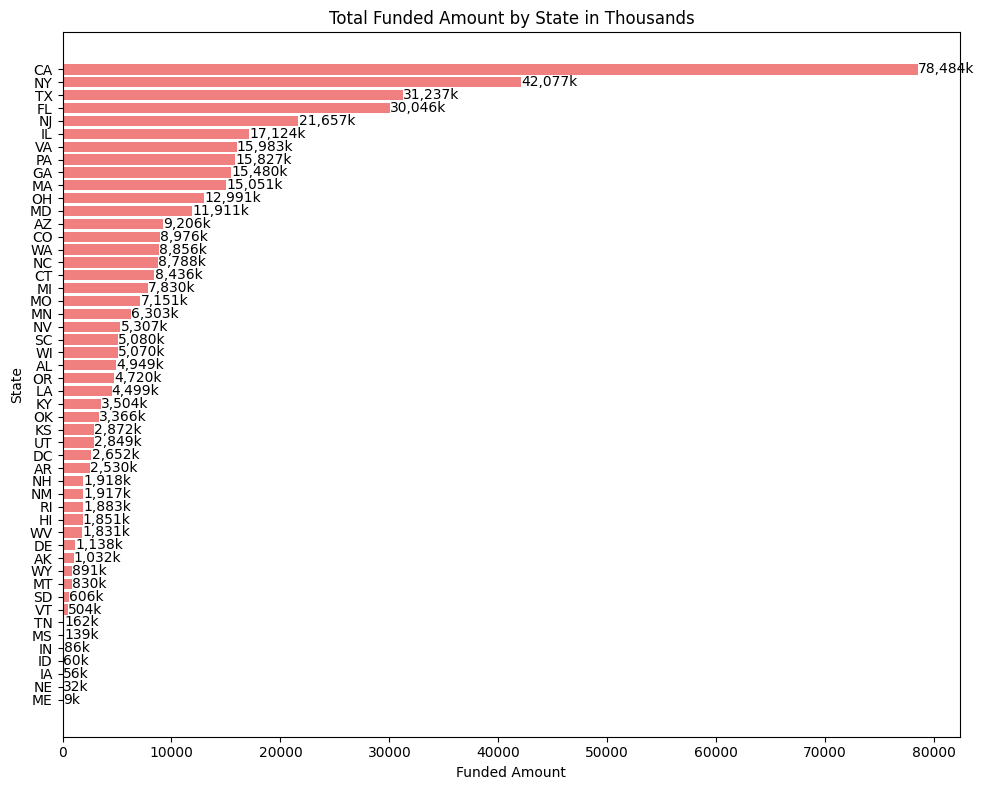

In [116]:
plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_k.index,state_funding_k.values,color='lightcoral')

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,
    f"{width:,.0f}k",va='center',fontsize=10)

plt.title('Total Funded Amount by State in Thousands')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# ***Regional Analysis by State for Amount Received***

In [156]:
state_funding1=df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_funding_k1=round(state_funding1/1000,2)

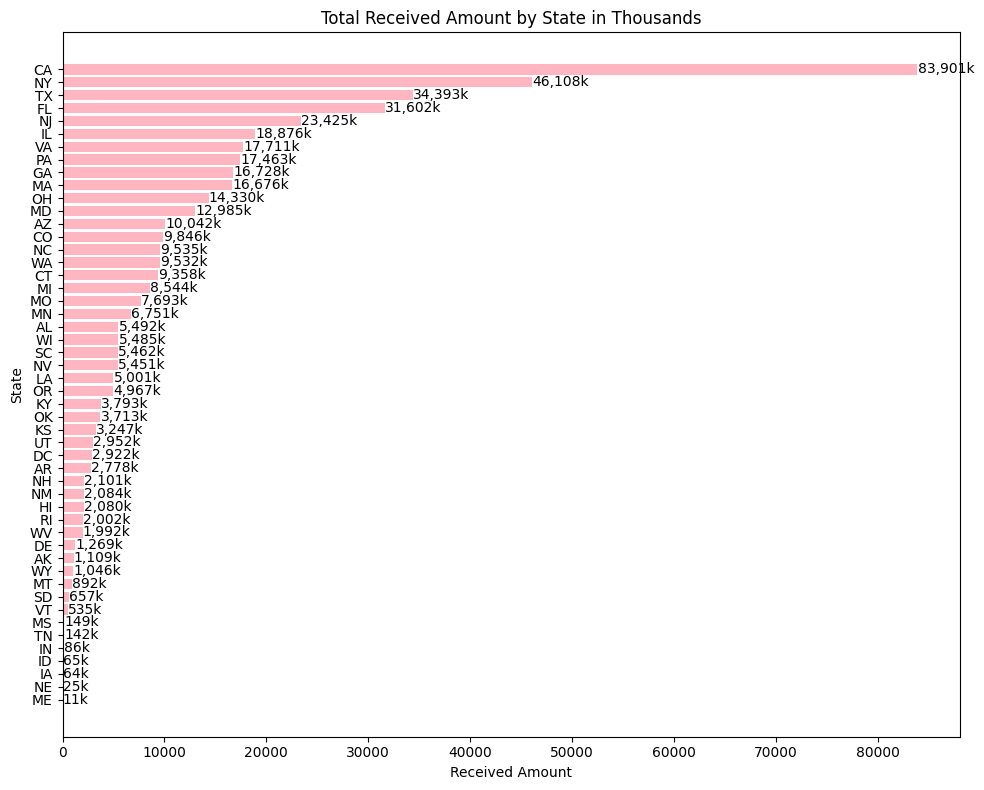

In [159]:
plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_k1.index,state_funding_k1.values,color='lightpink')

for bar in bars:
    width=bar.get_width()
    plt.text(width+10,bar.get_y()+bar.get_height()/2,
    f"{width:,.0f}k",va='center',fontsize=10)

plt.title('Total Received Amount by State in Thousands')
plt.xlabel('Received Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# ***Funding according to the term***

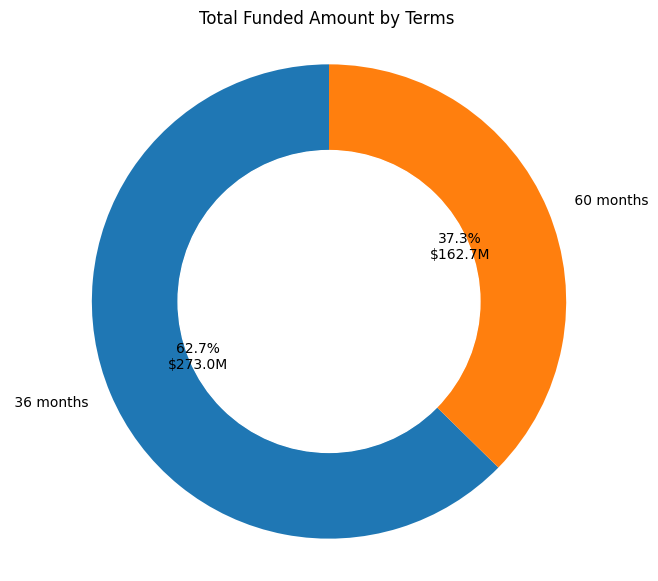

In [132]:
term_funding=df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(7,7))
plt.pie(
    term_funding,
    labels=term_funding.index,
    startangle=90,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding)/100:.1f}M",
    wedgeprops={'width':0.4},radius=1.1
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color='white'))
# plt.pie([1],radius=0.9)
plt.title('Total Funded Amount by Terms ')
plt.show()

# ***Funding and payment according to the Employment length***

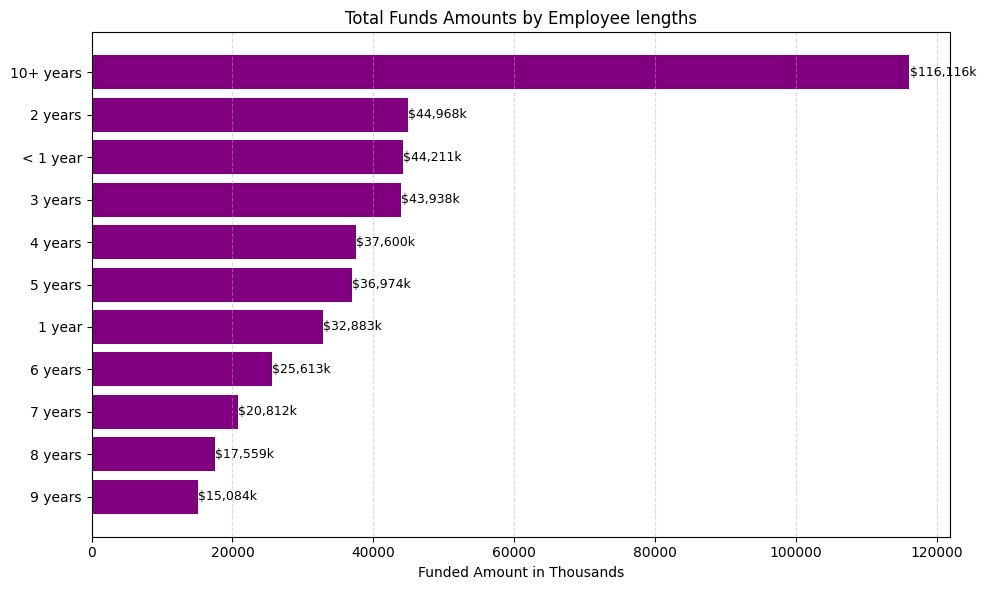

In [135]:
emp_funding=df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding.index,emp_funding,color='purple')

for bar in bars:
    width=bar.get_width()
    plt.text(width+5,bar.get_y()+bar.get_height()/2,
    f"${width:,.0f}k",va='center',fontsize=9)


plt.xlabel('Funded Amount in Thousands')
plt.title('Total Funds Amounts by Employee lengths')
plt.grid(axis='x',linestyle='--',alpha=0.48)
plt.tight_layout()
plt.show()

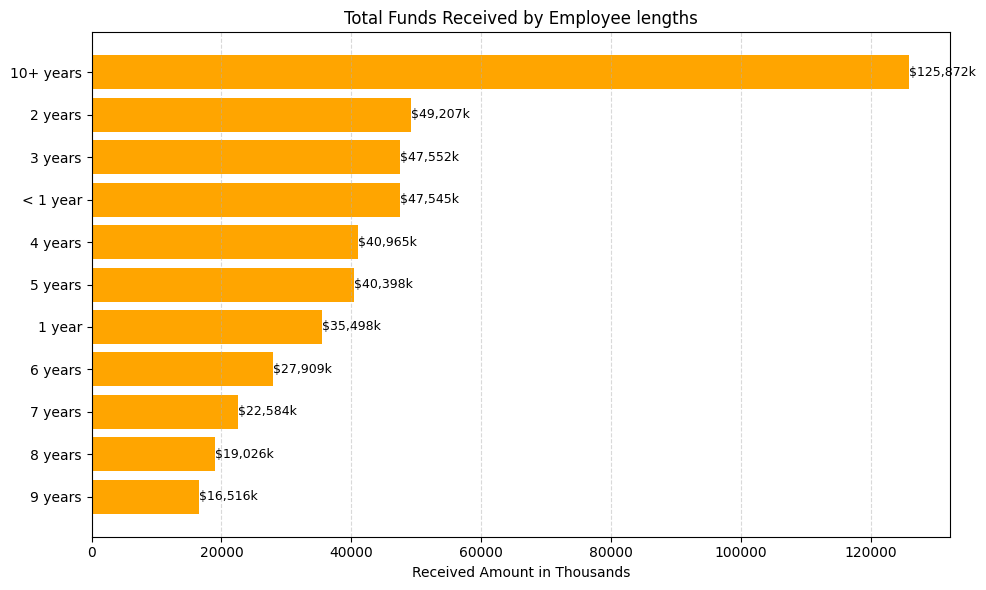

In [161]:
emp_funding1=df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize=(10,6))
bars = plt.barh(emp_funding1.index,emp_funding1,color='orange')

for bar in bars:
    width=bar.get_width()
    plt.text(width+5,bar.get_y()+bar.get_height()/2,
    f"${width:,.0f}k",va='center',fontsize=9)


plt.xlabel('Received Amount in Thousands')
plt.title('Total Funds Received by Employee lengths')
plt.grid(axis='x',linestyle='--',alpha=0.48)
plt.tight_layout()
plt.show()

# ***# Home Ownership by Total Funded Amount***

In [139]:
home_funding=df.groupby('home_ownership').loan_amount.sum().reset_index()
home_funding['loan_amount_millions']=home_funding.loan_amount/1000000

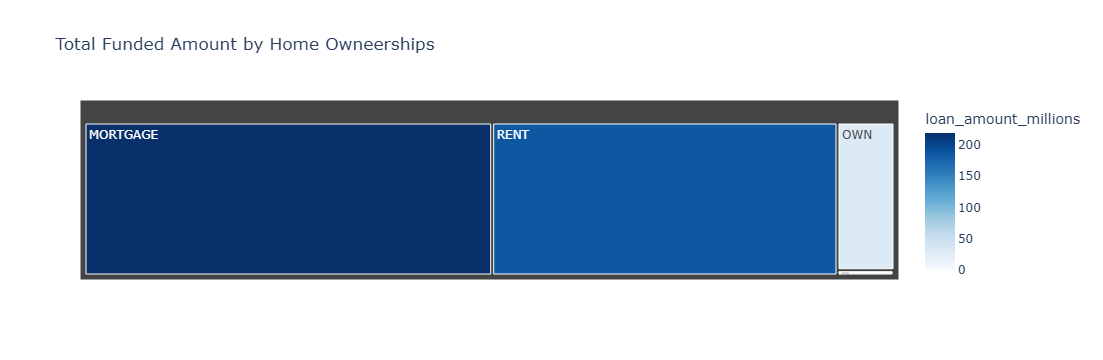

In [141]:
fig=px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Owneerships'
)

fig.show()


# ***Loan Purpose Breakdown***

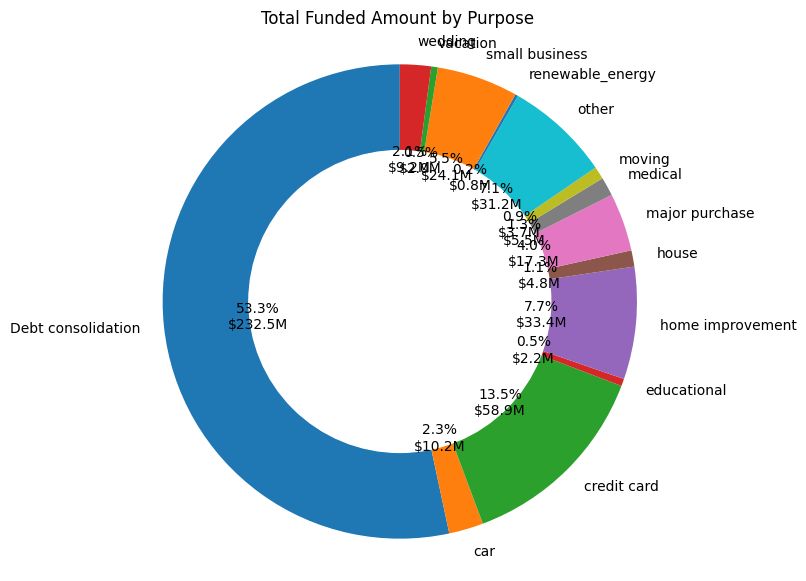

In [ ]:

purpose=df.groupby('purpose')['loan_amount'].sum()/1000000

plt.figure(figsize=(7,7))
plt.pie(
    purpose,
    labels=purpose.index,
    startangle=90,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(purpose)/100:.1f}M",
    wedgeprops={'width':0.4},radius=1.1
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color='white'))
# plt.pie([1],radius=0.9)
plt.title('Total Funded Amount by Purpose ')
# plt.tight_layout()
plt.show()